<a href="https://colab.research.google.com/github/lonespear/MA206/blob/main/Lesson_14_Two_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('explore')
install.packages('faraway')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘crosstalk’, ‘lazyeval’, ‘DT’, ‘gridExtra’, ‘palmerpenguins’, ‘plotly’, ‘rpart.plot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Rdpack’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lme4’




In [4]:
library(tidyverse)
library(explore)
library(faraway)
data(wcgs)
wbc <- read_csv("https://raw.githubusercontent.com/lonespear/MA206/main/wisconsin_breast_cancer.csv")
ranger <- read_csv("https://raw.githubusercontent.com/lonespear/MA206/main/ranger_school.csv")

New names:
• `` -> `...33`
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 568 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): diagnosis
dbl (31): id, radius_mean, texture_mean, perimeter_mean, area_mean, smoothne...
lgl  (1): ...33

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 289 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): State
dbl (26): Record Number, mdl_raw, mdl_points, spr_raw, spr_points, hrpu_raw,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Lesson 14: Two Means and the Two-Sample T-Test

Last lesson we discussed how to compare two proportions to test for a significant difference.

Today we will extend this to quantitative variables building from our knowledge of the one-sample t-test.

### 1. Ask a research question
Is there a difference in the mean 12-mile ruck time for someone who passes Ranger School compared to someone who did not?

### 2. Write your null and alternative hypotheses:
Let $\mu_1$ be the mean ruck time for those who **pass** Ranger School, and $ \mu_2$ be the mean ruck time for those who **fail**.

- **Null Hypothesis $H_0$**: $ \mu_1 - \mu_2 = 0 $ (No difference in mean ruck times)
- **Alternative Hypothesis $H_A$**: $ \mu_1 - \mu_2 \neq 0 $ (There is a difference in mean ruck times)

### 3. Explore the data and find your observed statistics:
We will use the difference in our sample means as our observed statistic.

- **Observed Statistic**:
  $\bar{x}_1 - \bar{x}_2$
- **Standardize your Observed Statistic**: $ t = \frac{(\bar{x}_1 - \bar{x}_2) - \mu_{null}}{SD_{null}} $

In our hypothesis statements we are assuming no diffference, so $\mu_0 = 0$. The formula for standard deviation of our null distribution is $ \sqrt{\frac{s_1^2}{n_1^2} + \frac{s_2^2}{n_1^2}} $.

Putting that all together our standardized statistic becomes:

$$
 t = \frac{(\bar{x}_1 - \bar{x}_2)}{\sqrt{\frac{s_1^2}{n_1^2} + \frac{s_2^2}{n_1^2}}}
$$

### 4. Interpret your strength of evidence:
 We obtain a p-value the same way as in a one-sample t-test. We have converted our observed statistic into a standardized value that is in units of standard deviations away from the null distribution.

For a two-sided hypothesis test like this example is using:

$$
\begin{align*}
p-value &= 2 \cdot \mathbb{P}(T > |t|) = 2 \cdot \int_{|t|}^\infty f_T(x) dx \\
&= 2 \cdot (1 - pt(|t|)) \ \ \ \ \text{R code}
\end{align*}
$$




In [5]:
wcgs %>% head

,age,height,weight,sdp,dbp,chol,behave,cigs,dibep,chd,typechd,timechd,arcus
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>
1,49,73,150,110,76,225,A2,25,A,no,none,1664,absent
2,42,70,160,154,84,177,A2,20,A,no,none,3071,present
3,42,69,160,110,78,181,B3,0,B,no,none,3071,absent
4,41,68,152,124,78,132,B4,20,B,no,none,3064,absent
5,59,70,150,144,86,255,B3,20,B,yes,infdeath,1885,present
6,44,72,204,150,90,182,B4,0,B,no,none,3102,absent


Warning message:
“Removed 12 rows containing non-finite outside the scale range (`stat_bin()`).”


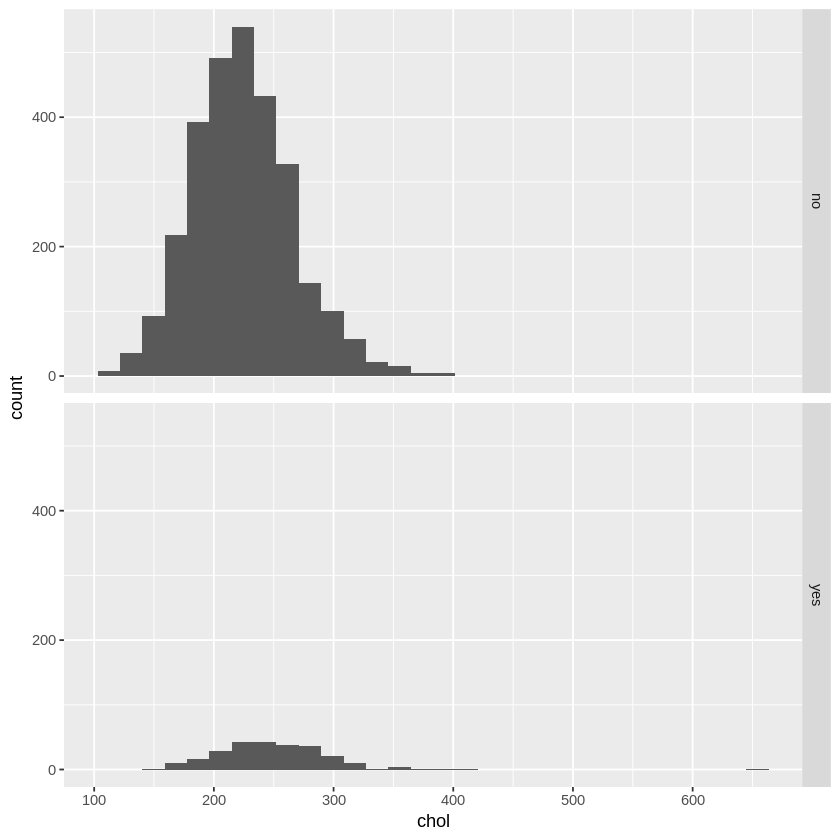

In [ ]:
wcgs %>% ggplot(aes(x=chol)) + geom_histogram(bins=30) + facet_grid(chd ~ .)

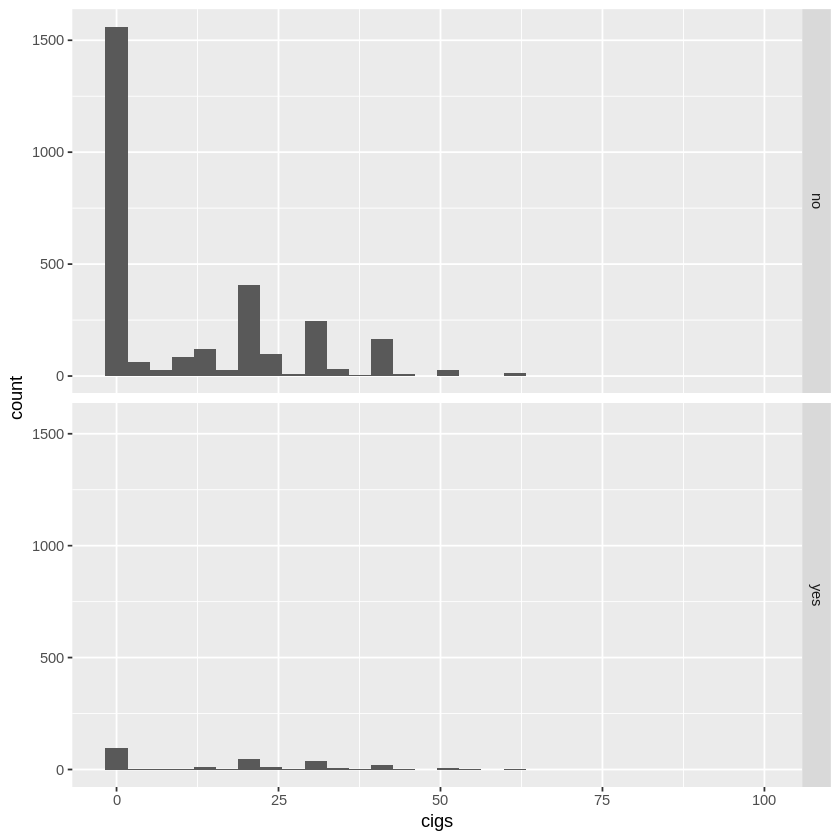

In [ ]:
wcgs %>% ggplot(aes(x=cigs)) + geom_histogram(bins=30) + facet_grid(chd ~ .)

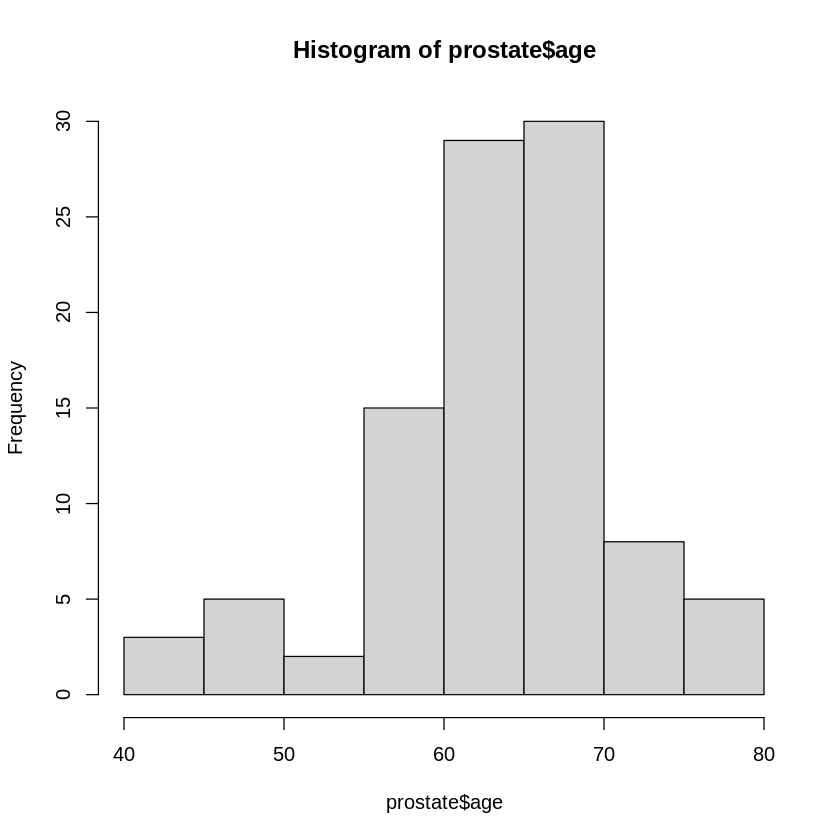

In [ ]:
hist(prostate$age)

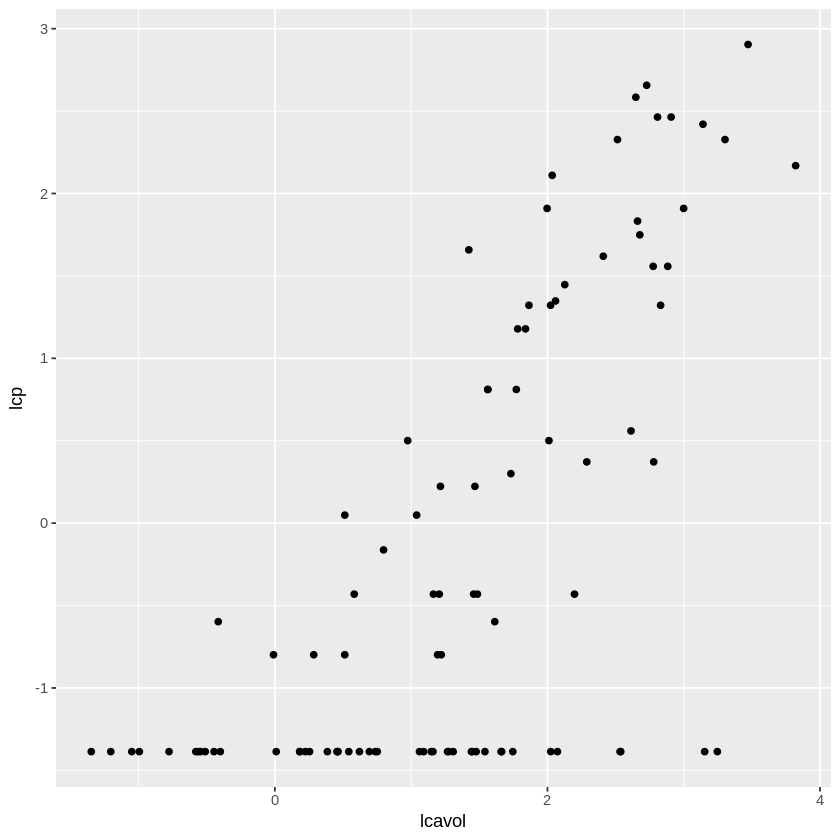

In [ ]:
prostate %>% ggplot(aes(x=lcavol, y=lcp)) + geom_point()

In [ ]:
data(chredlin)

In [ ]:
chredlin %>% head

,race,fire,theft,age,involact,income,side
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
60626,10.0,6.2,29,60.4,0.0,11.744,n
60640,22.2,9.5,44,76.5,0.1,9.323,n
60613,19.6,10.5,36,73.5,1.2,9.948,n
60657,17.3,7.7,37,66.9,0.5,10.656,n
60614,24.5,8.6,53,81.4,0.7,9.730,n
60610,54.0,34.1,68,52.6,0.3,8.231,n


In [ ]:
help(troutegg)

In [ ]:
data(sono)
sono

,Intensity,Molarity,Solute,pH,Gas,Water,Horn,Flask
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,80.6,down,down,down,down,down,down,down
2,66.1,up,down,down,down,down,up,up
3,59.1,down,up,down,down,up,down,up
4,68.9,up,up,down,down,up,up,down
5,75.1,down,down,up,down,up,up,up
6,373.8,up,down,up,down,up,down,down
7,66.8,down,up,up,down,down,up,down
8,79.6,up,up,up,down,down,down,up
9,114.3,down,down,down,up,up,up,down


In [ ]:
death %>% head

,y,penalty,victim,defend
,<dbl>,<fct>,<fct>,<fct>
1,19,yes,w,w
2,132,no,w,w
3,0,yes,b,w
4,9,no,b,w
5,11,yes,w,b
6,52,no,w,b
